# Decision tree fraud check

<h3> Import all the required libraries </h3>

In [2]:
#<h3> Import all the required libraries </h#importing required lib's
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
import matplotlib.pyplot as plp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

# EDA

In [3]:
#reading the datasets
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [5]:
#size of the overall dataset
df.shape

(600, 7)

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
fraud_status       0
dtype: int64

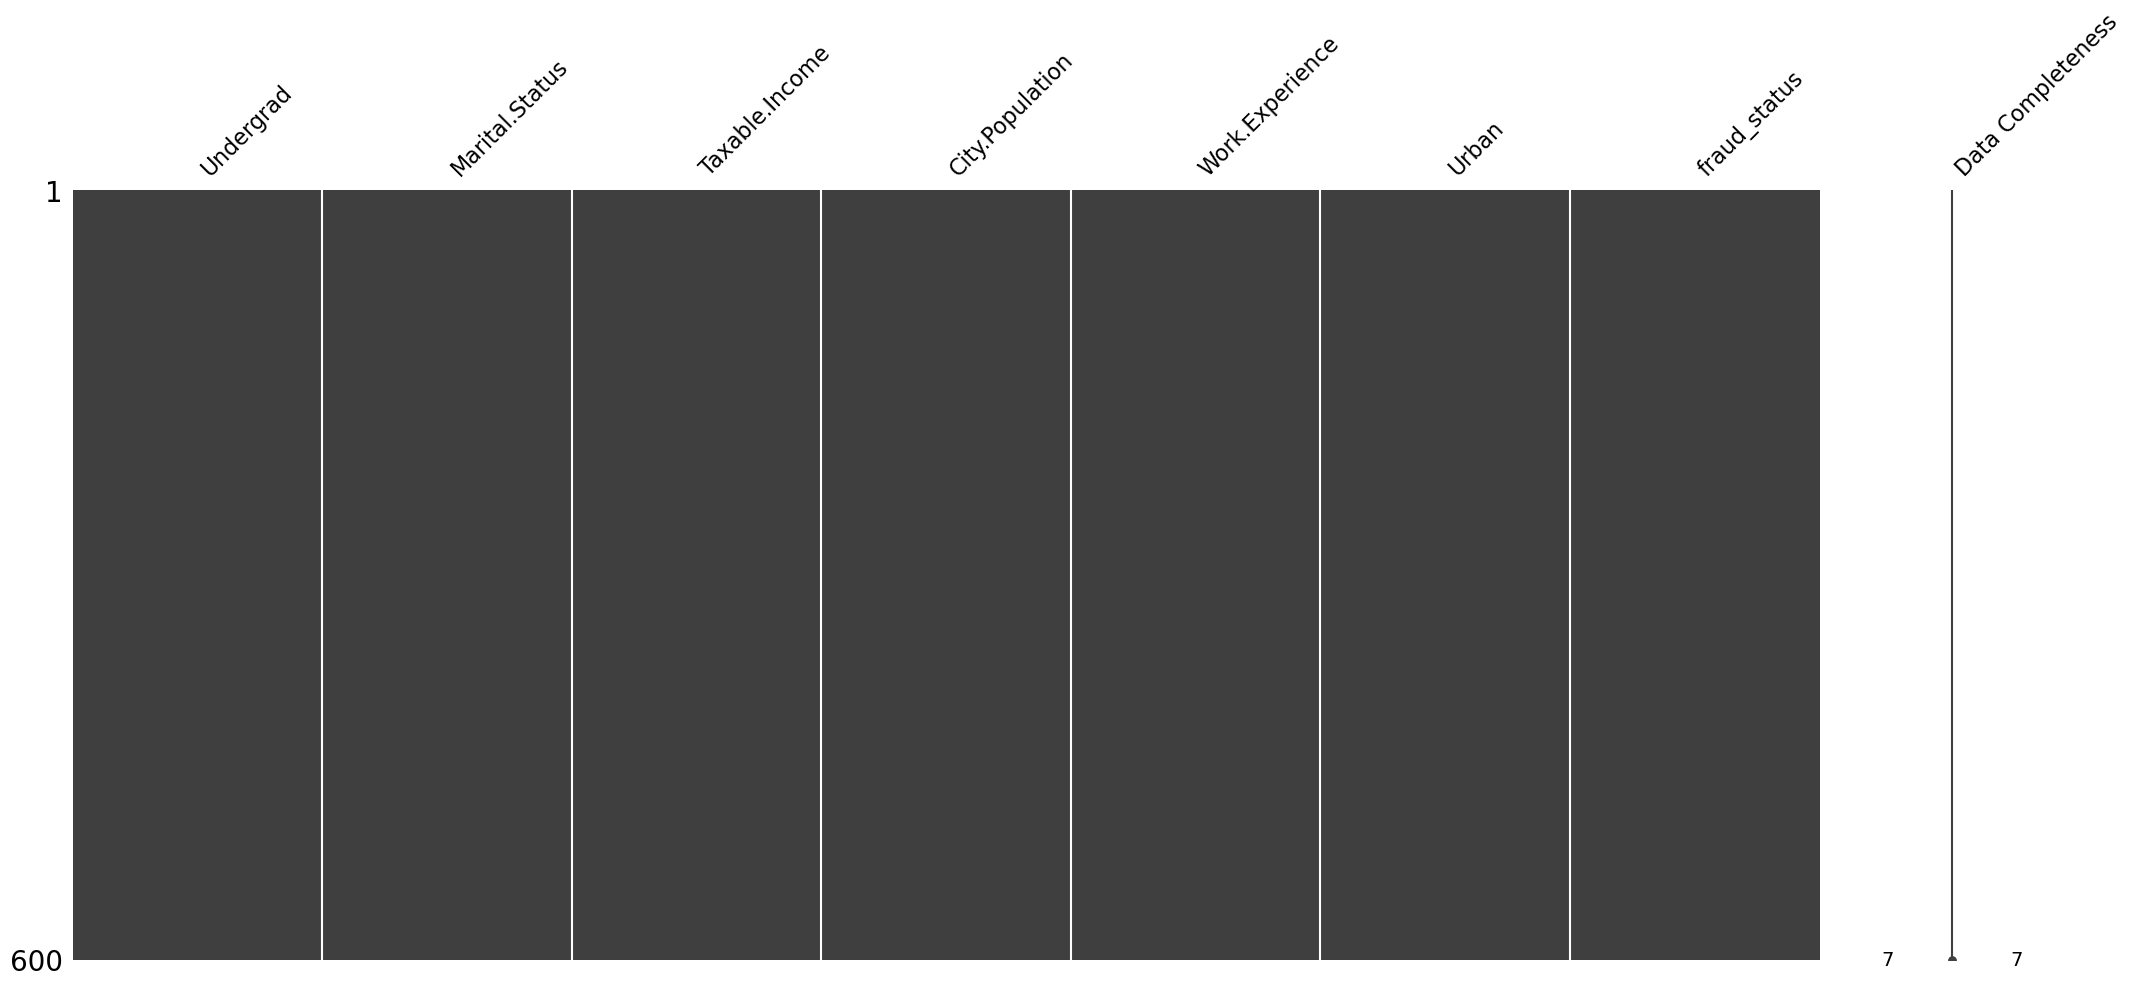

In [6]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [7]:
#different datatypes in dataframe
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
fraud_status       object
dtype: object

In [8]:
#converting the catgorical data into numerical using Labelencoder
df['Undergrad']=LabelEncoder().fit_transform(df['Undergrad'])
df['Marital.Status']=LabelEncoder().fit_transform(df['Marital.Status'])
df['Urban']=LabelEncoder().fit_transform(df['Urban'])
df['fraud_status']=LabelEncoder().fit_transform(df['fraud_status'])

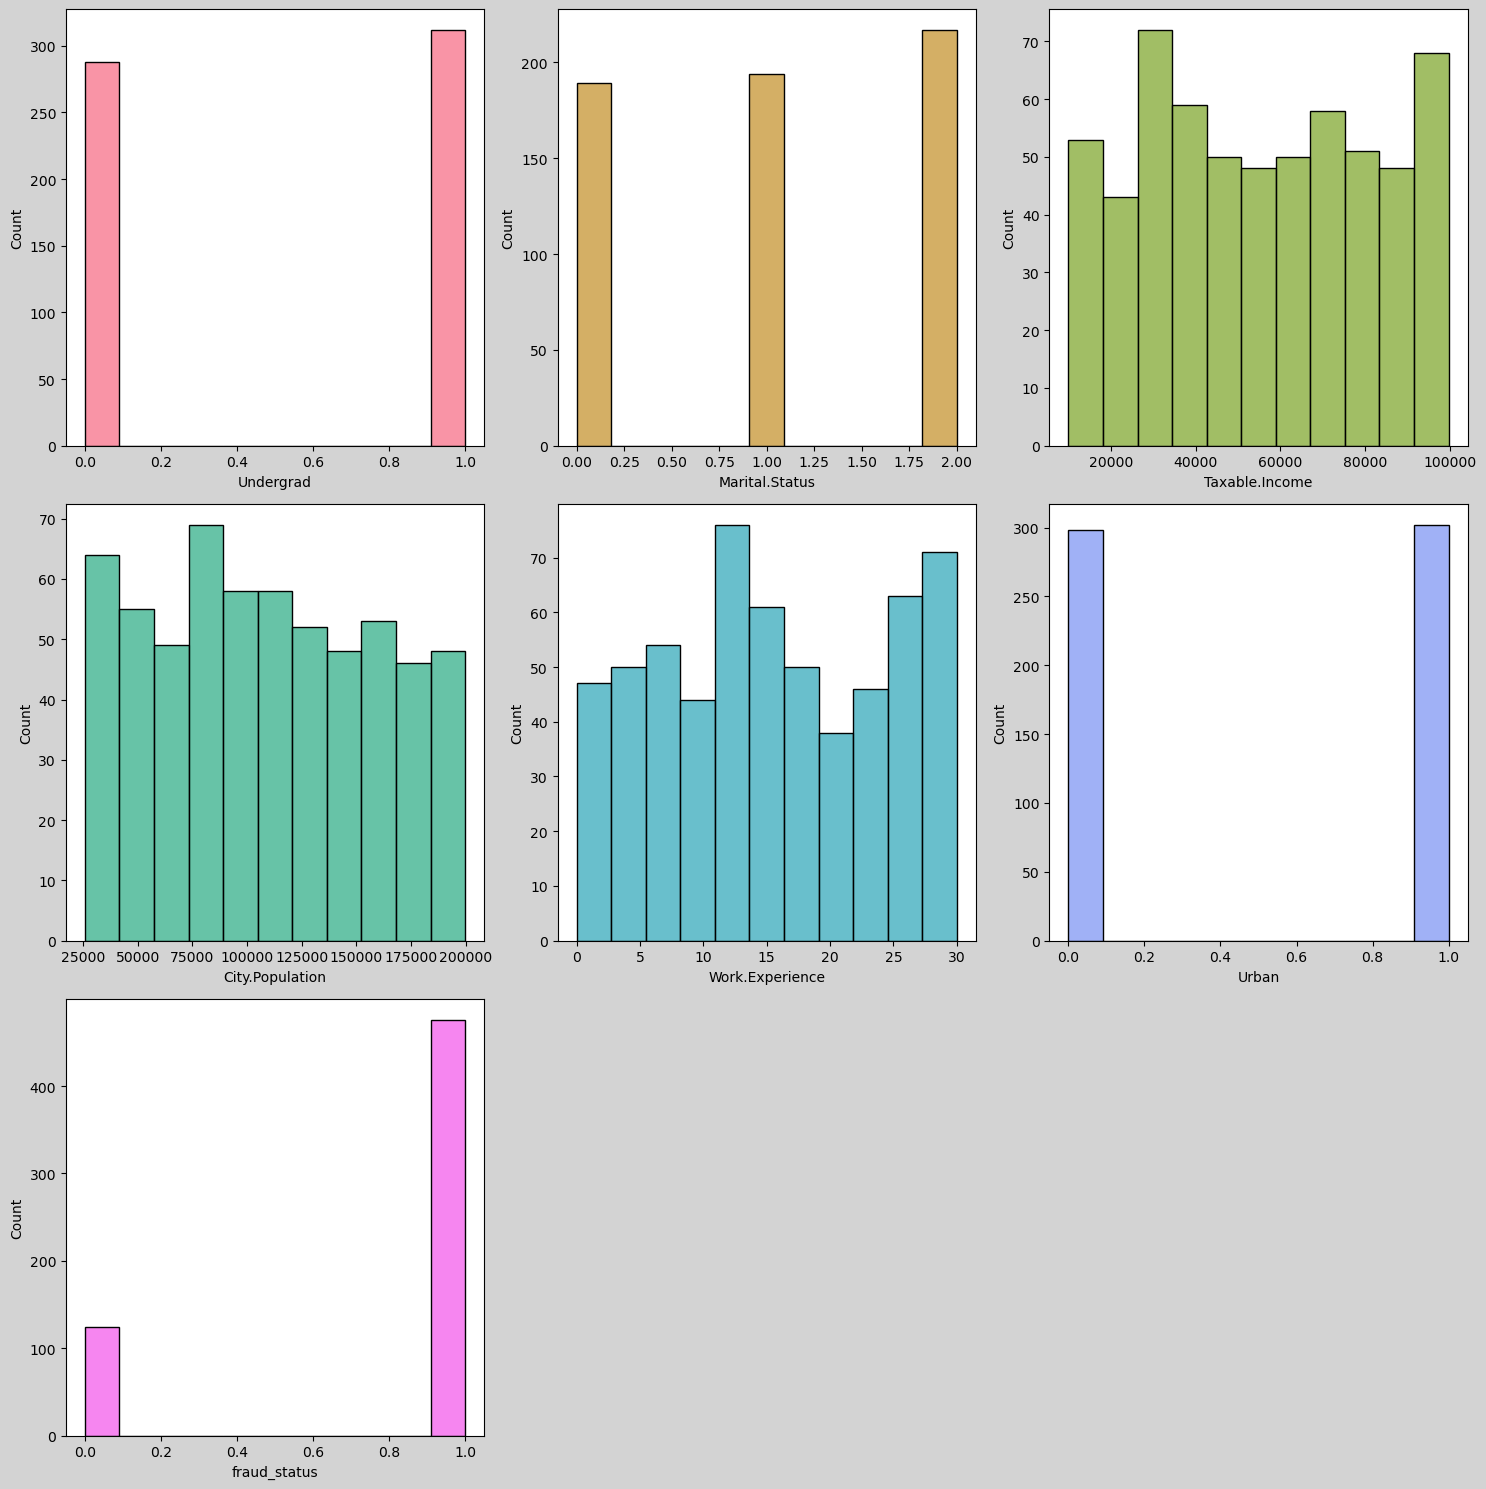

In [9]:
import matplotlib.pyplot as plt
c=3
r=3
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

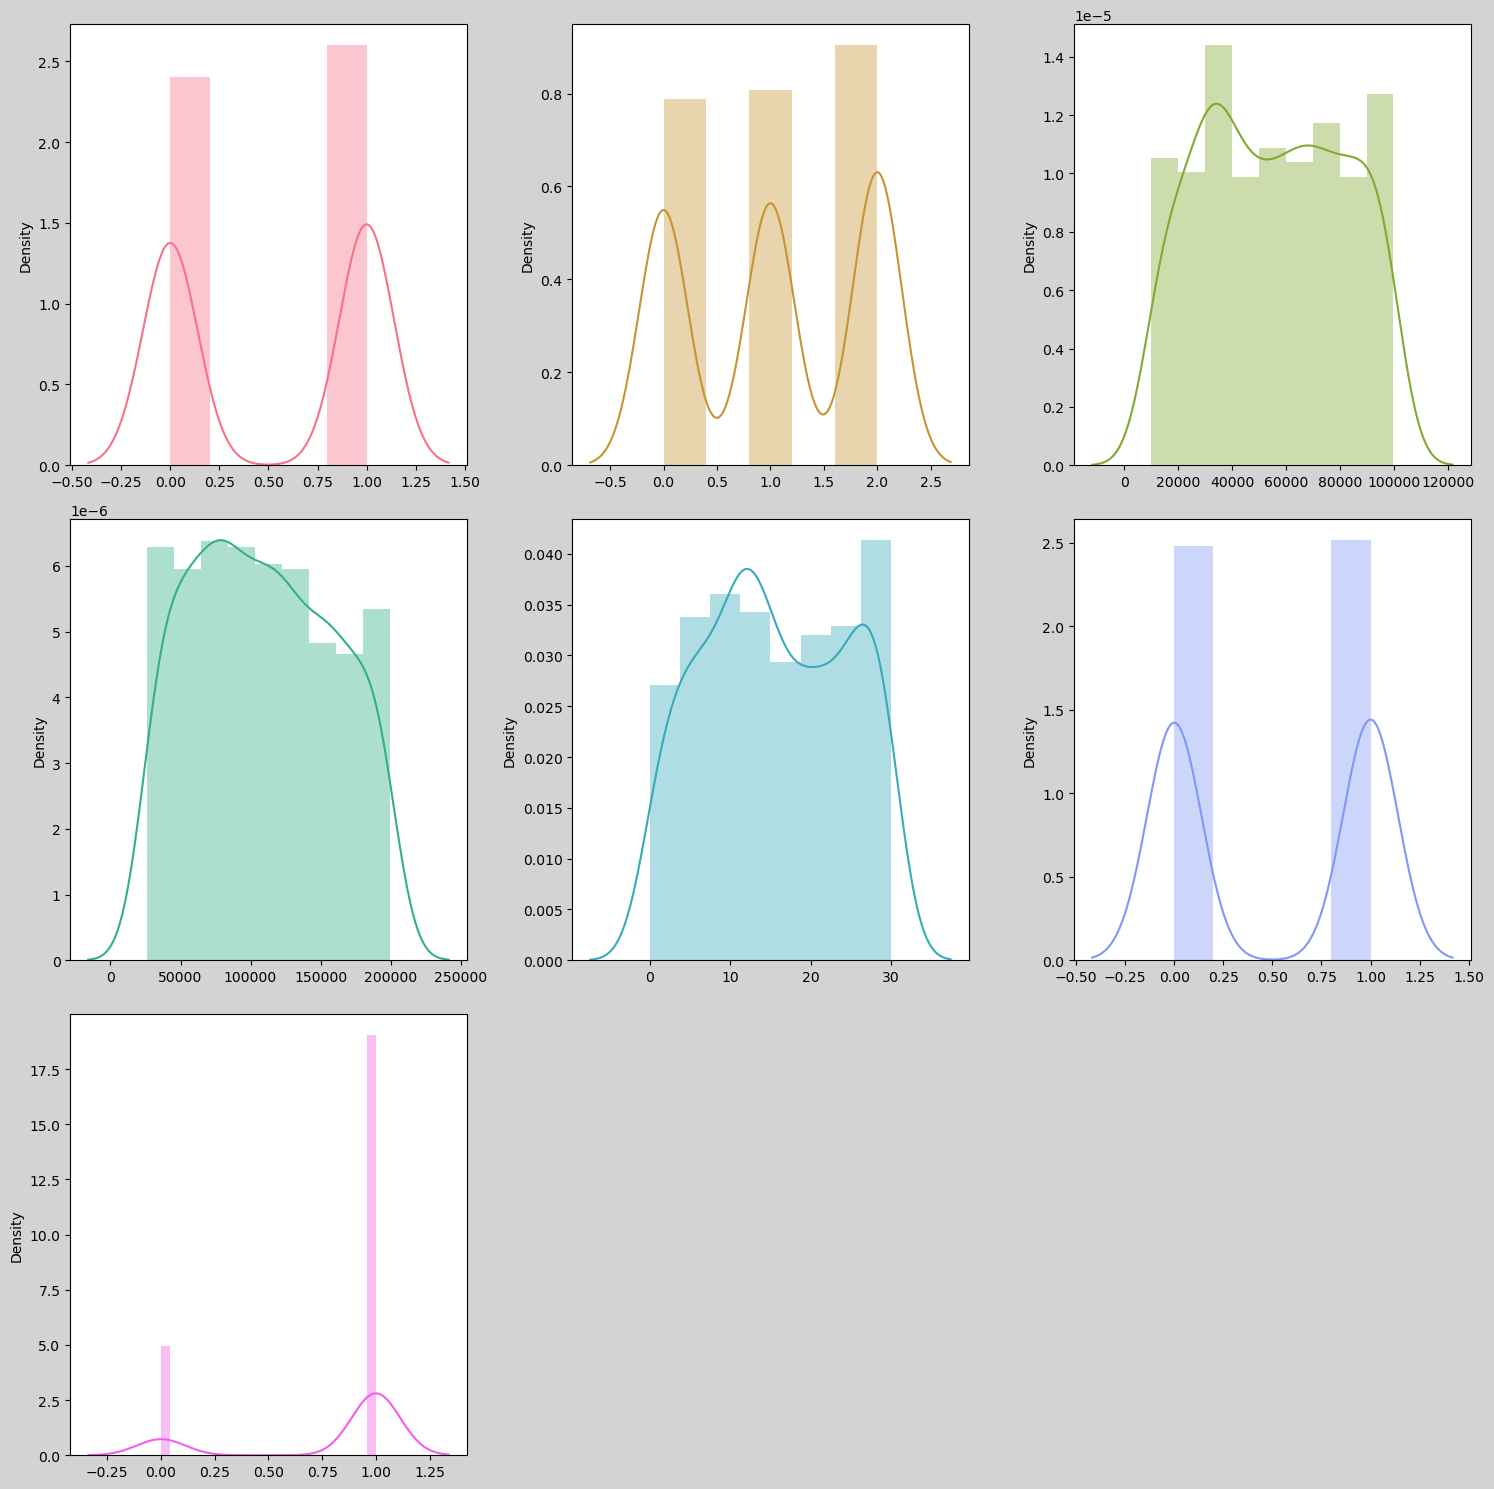

In [10]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=3
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

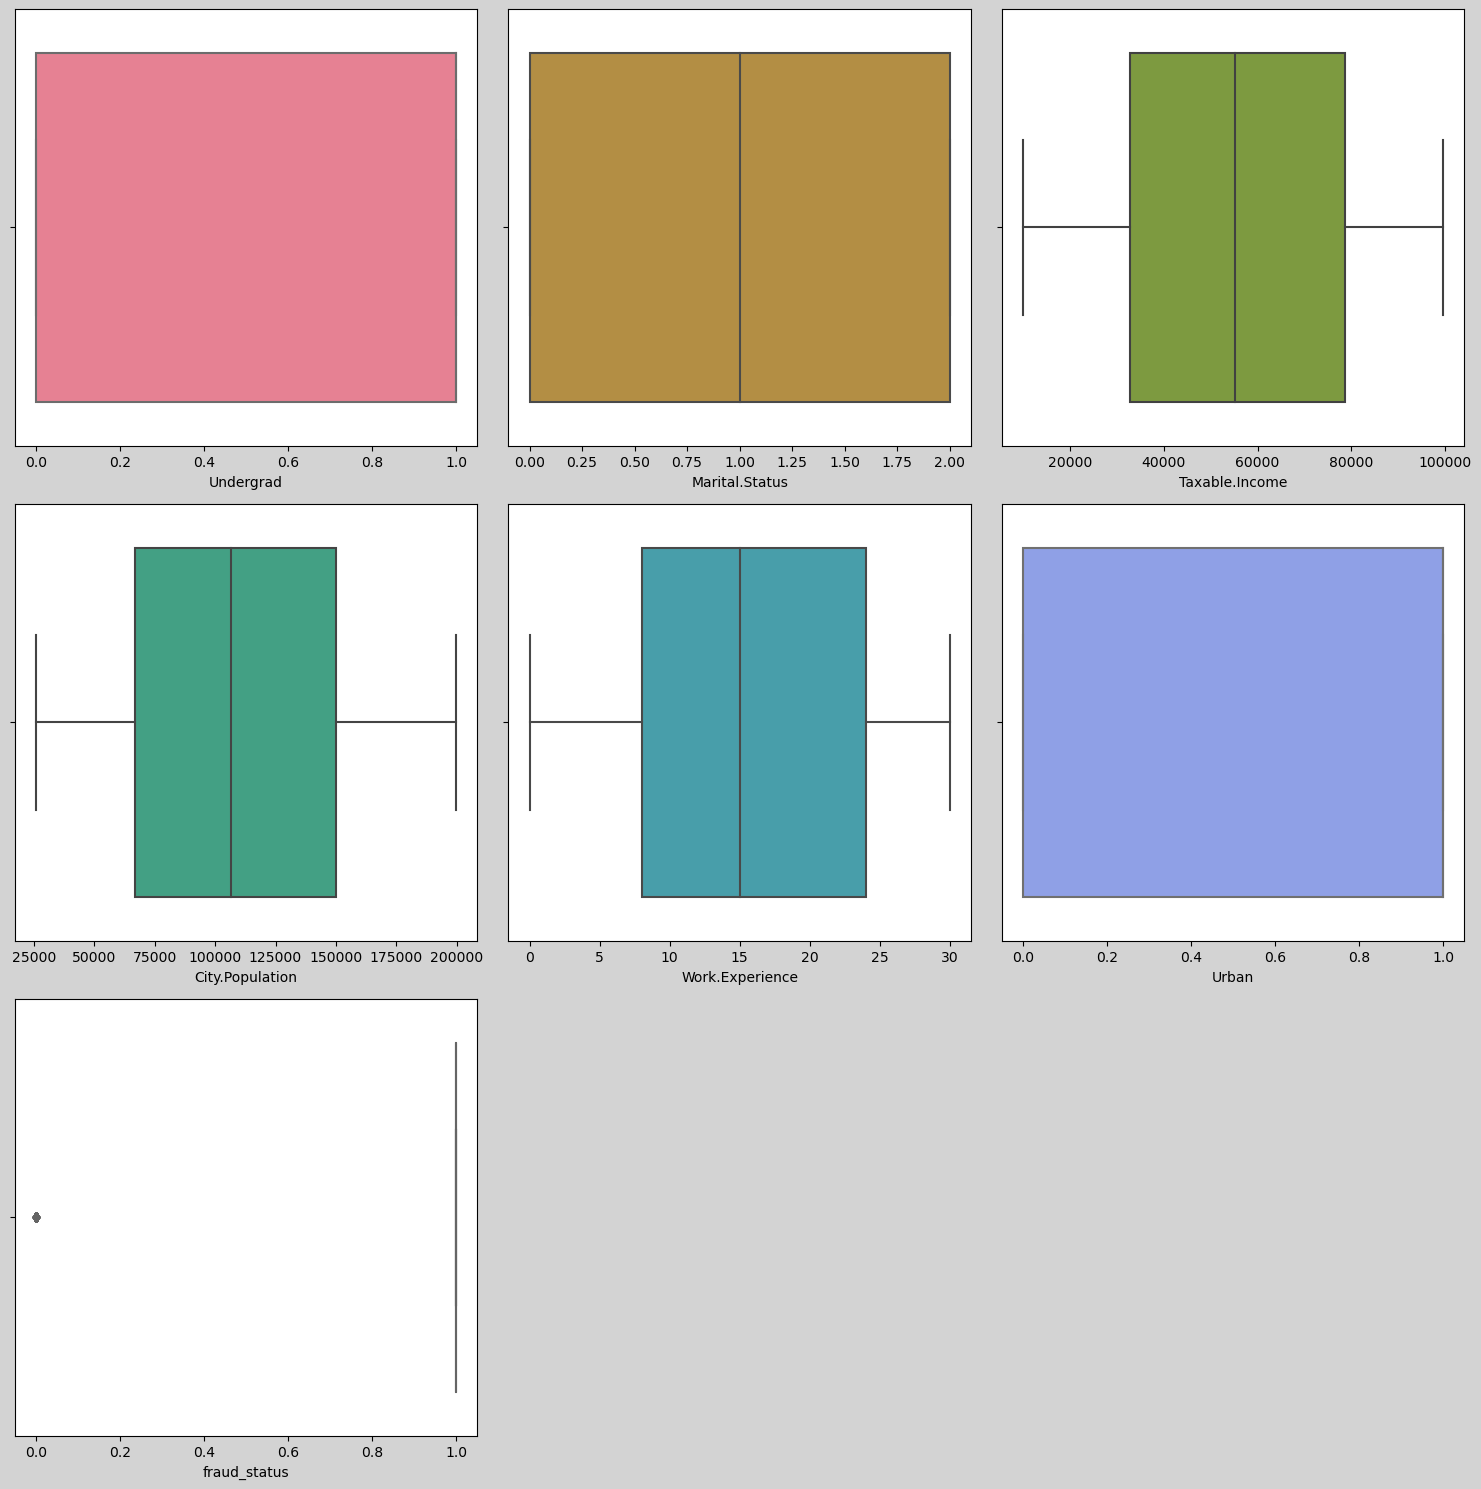

In [12]:
#performing univerent analysis
c=3
r=3
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,-0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,-0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,-0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,-0.004830
fraud_status,-0.012523,-0.006081,0.688725,-0.012225,0.001972,-0.004830,1.000000


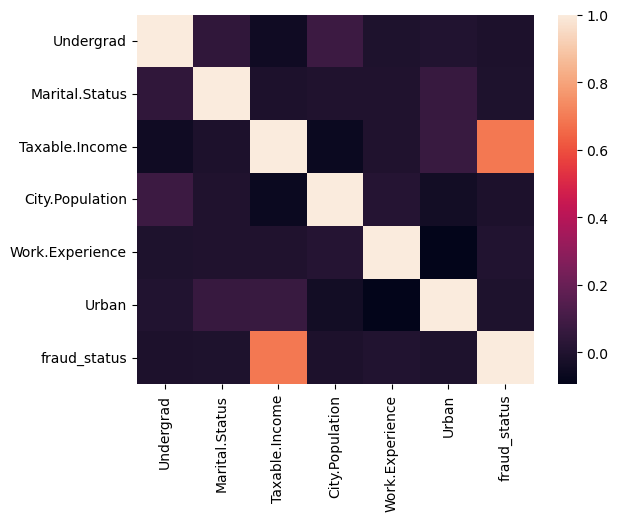

In [13]:
#checking the co-relation of variables
sns.heatmap(df.corr())
df.corr()

In [14]:
df.var()

Undergrad          2.500167e-01
Marital.Status     6.756149e-01
Taxable.Income     6.866930e+08
City.Population    2.485030e+09
Work.Experience    7.818357e+01
Urban              2.504062e-01
fraud_status       1.642293e-01
dtype: float64

In [15]:
print('skewness:',df['fraud_status'].skew())
print('kurtosis:',df['fraud_status'].kurtosis())

skewness: -1.4525001868657426
kurtosis: 0.11011270752348823


In [18]:
scale=StandardScaler().fit_transform(df.iloc[:,:-1])

In [19]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.793333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,1.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [20]:
#spliting data as train and test
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [21]:
#creating the model
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
#accuracy of the model
ypred=model.predict(X_test)
pred=pd.Series(ypred)
accuracy_score(y_test,pred)

1.0

In [24]:
y_test.head()

111    1
299    1
39     1
162    1
565    1
Name: fraud_status, dtype: int32

In [25]:
full=DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(x,y)

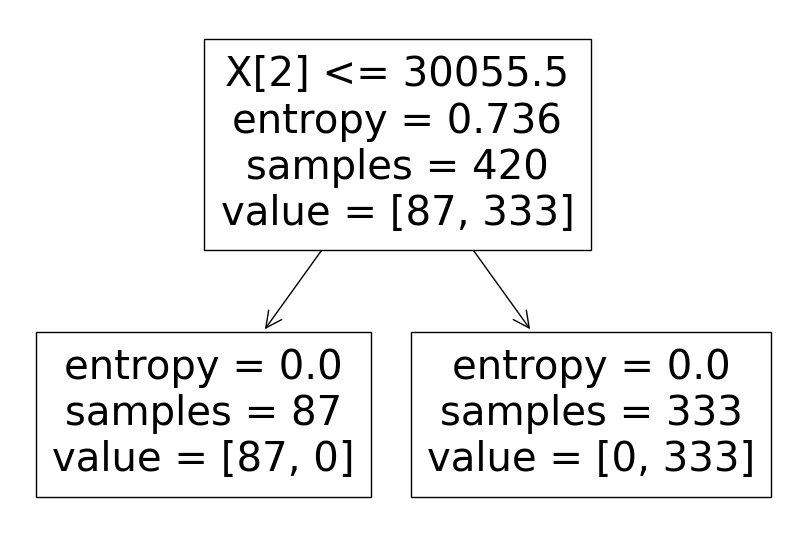

In [27]:
#ploting the decision tree
from sklearn import tree

plp.figure(figsize=(10,7))
tree.plot_tree(model);

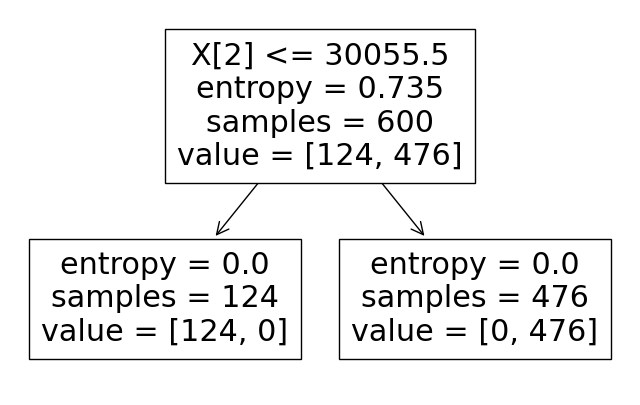

In [28]:
#for overall prediction decision tree will be as fallows

plp.figure(figsize=(8,5))
tree.plot_tree(full);

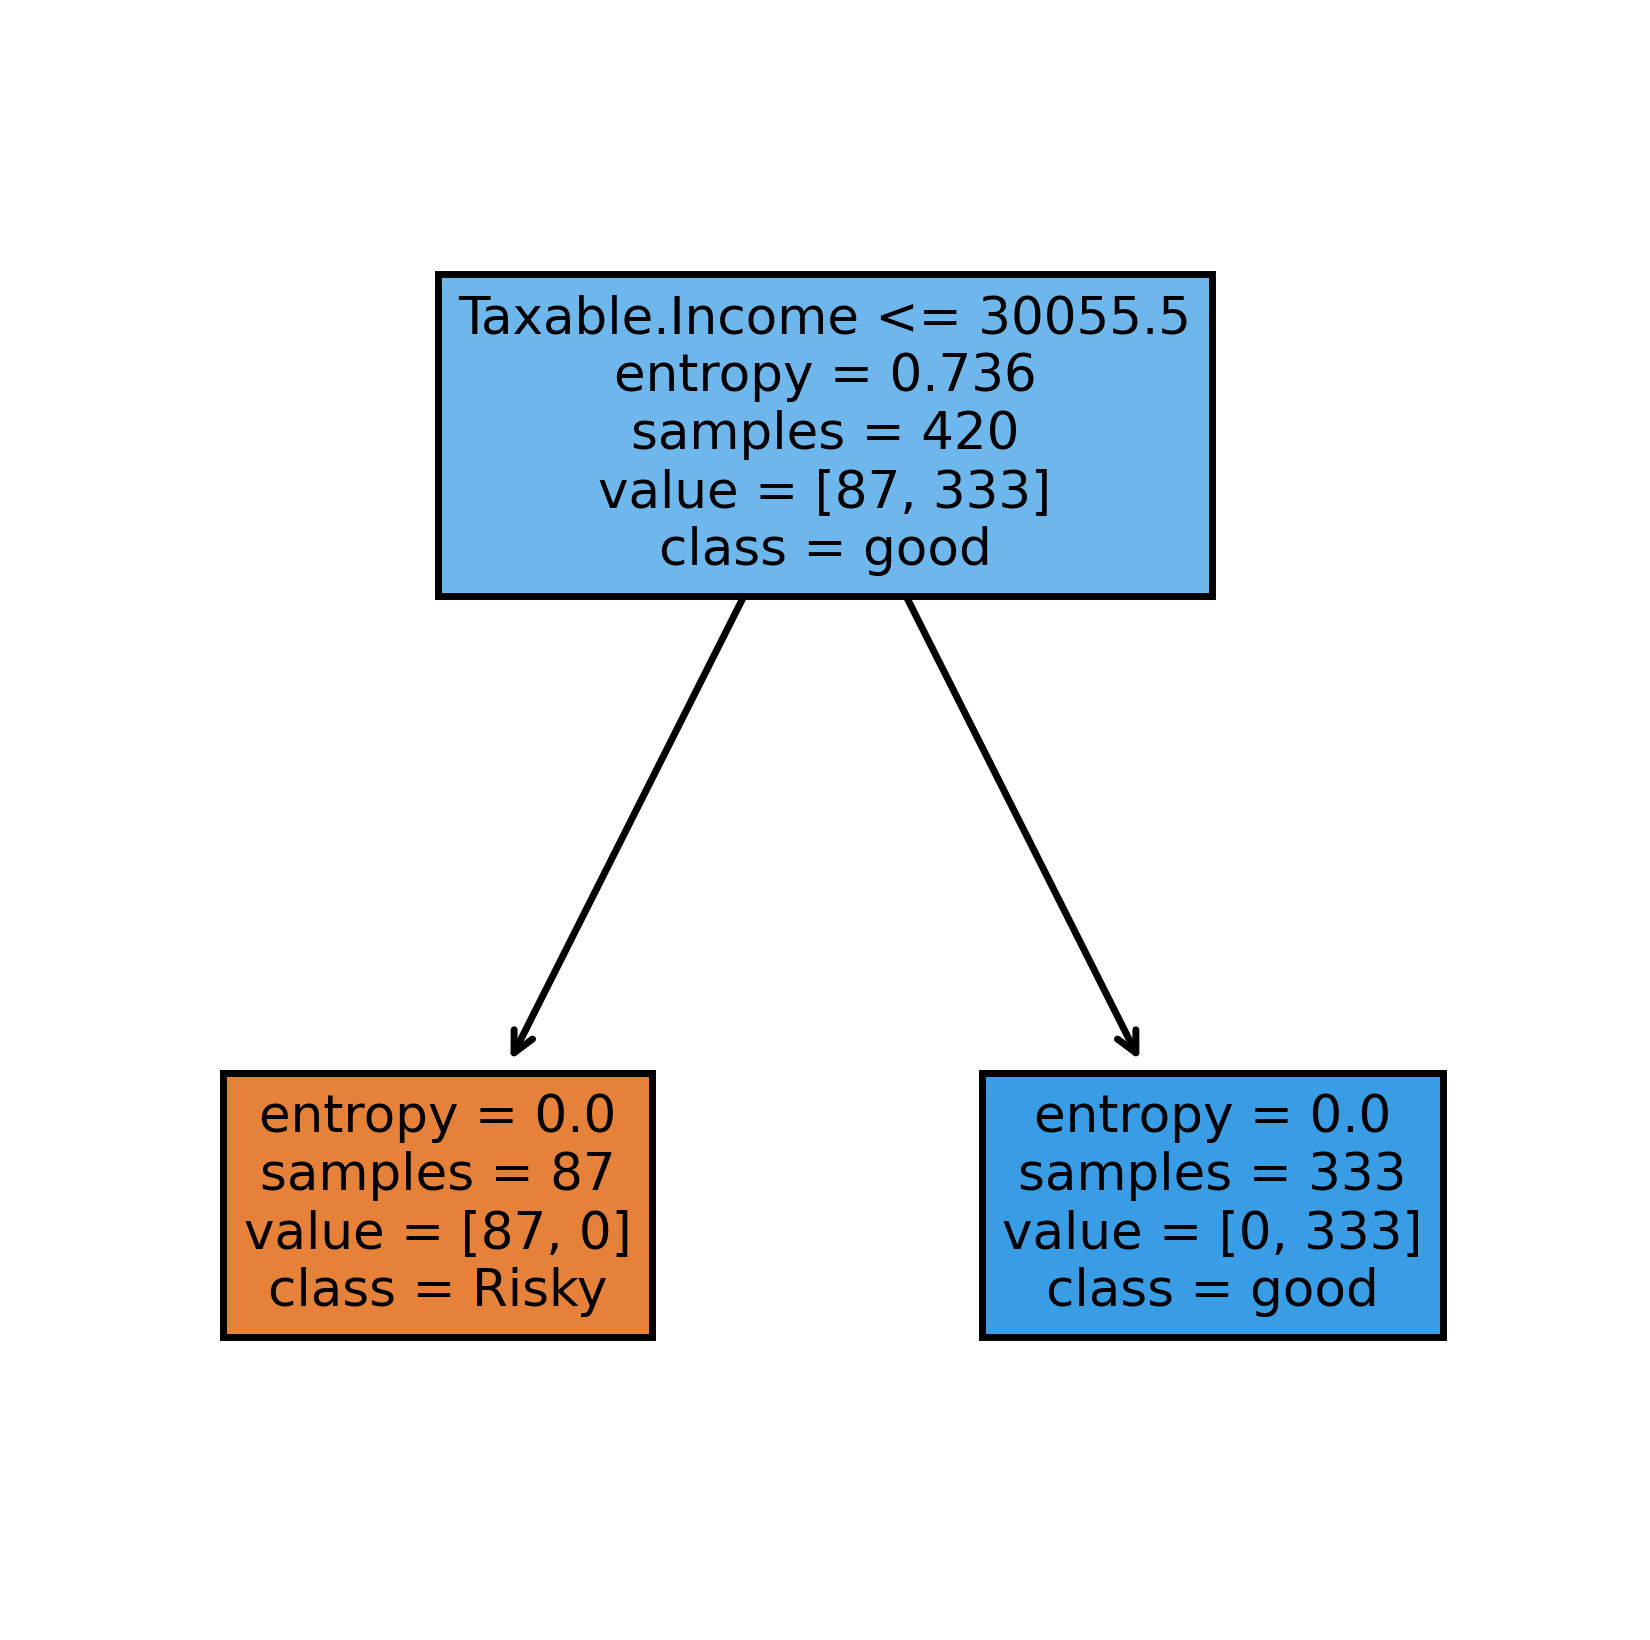

In [29]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban'] #.columns
cn=['Risky','good']    #.value_count.keys
fig, axes = plp.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

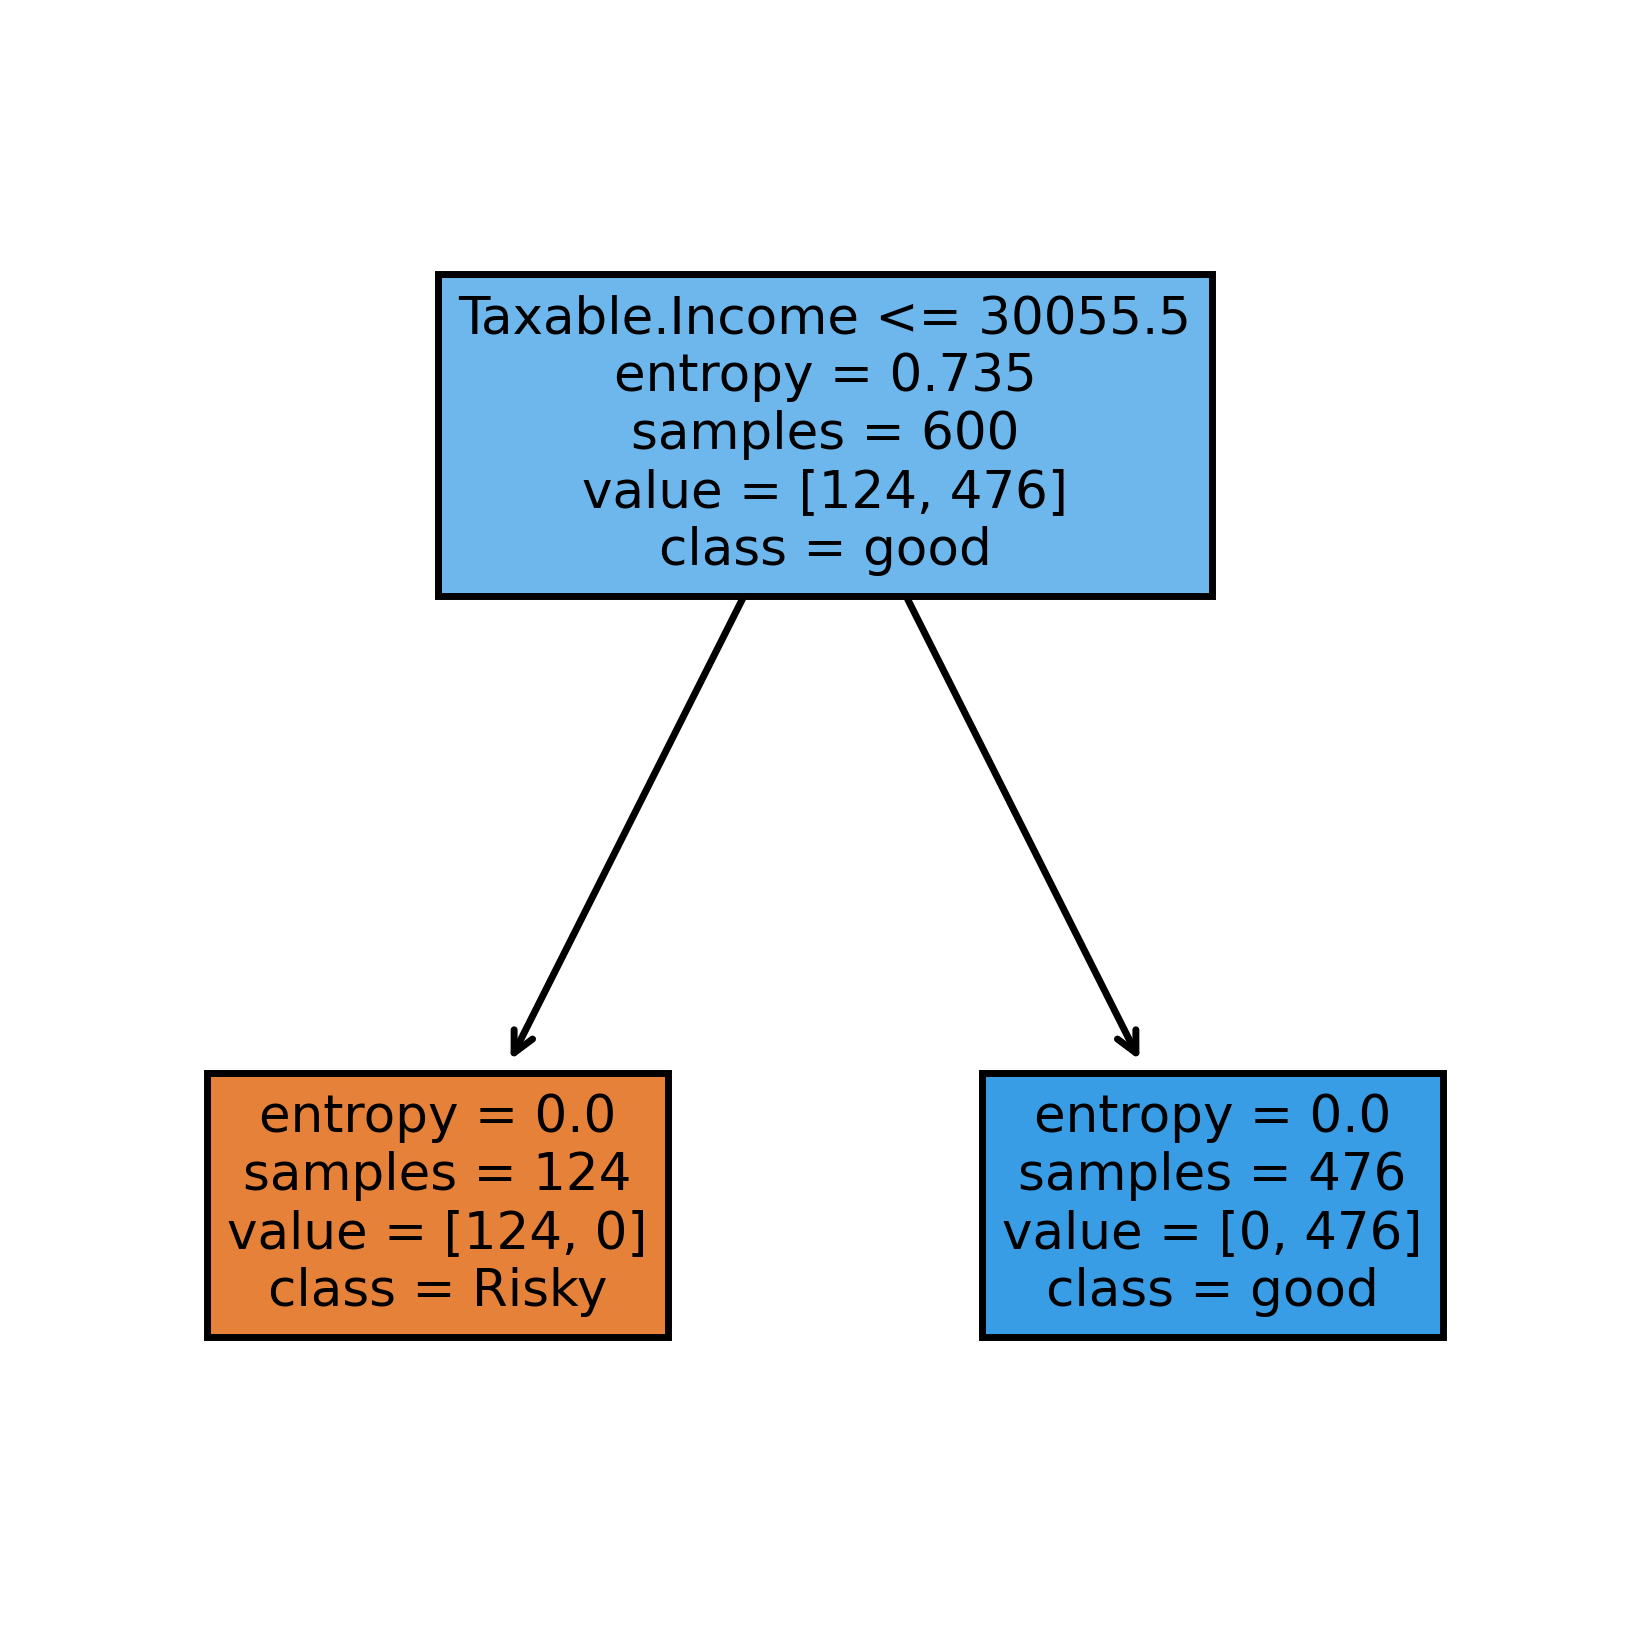

In [30]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban'] #.columns
cn=['Risky','good']    #.value_count.keys
fig, axes = plp.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(full,
               feature_names = fn, 
               class_names=cn,
               filled = True);